# 🌡️ 연도별 7월 폭염 데이터 분석 실습

이 노트북은 여러 연도의 7월 폭염 데이터를 바탕으로 **연도별 평균 최고기온의 변화**를 분석하는 실습 예제입니다.

## ✅ 실습 목표
- 폭염 관련 `.csv` 데이터를 연도별로 통합한다.
- `pandas`로 날짜 데이터를 처리하고 연도별로 그룹화한다.
- `matplotlib`을 이용해 시계열 그래프로 시각화한다.

---

## 🔧 Step 1. 라이브러리 불러오기

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


## 📂 Step 2. 데이터 파일 불러오기 및 연도 통합

In [3]:
# 변환된 폭염 CSV 파일 리스트
file_paths = [
    "heatwave_2021_07.csv",
    "heatwave_2022_07.csv",
    "heatwave_2023_07.csv",
    "heatwave_2024_07.csv",
    "heatwave_2025_07.csv"
]

# 연도별 통합 데이터프레임 생성
combined_df = pd.DataFrame()

for path in file_paths:
    df = pd.read_csv(path, encoding="utf-8-sig")
    df.columns = df.columns.str.strip()  # 공백 제거
    if '일시' in df.columns:
        df['일시'] = pd.to_datetime(df['일시'], errors='coerce')
        df['연도'] = df['일시'].dt.year
        combined_df = pd.concat([combined_df, df], ignore_index=True)

combined_df.head() # 5개의 연도별 데이터셋 csv 파일을 통합하여 dataframe 으로 변환 후 앞부분만 출력

,일시,지점,폭염여부(O/X),최고체감온도(°C),최고기온(°C),평균기온(°C),최저기온(°C),평균상대습도(%),폭염특보(O/X),폭염영향예보(단계),열대야(O/X),자외선지수(단계),연도
0,2021-07-01,북강릉(104),X,28.1,26.4,21.8,18.1,86.8,X,,X,높음,2021
1,2021-07-01,동해(106),X,27.4,25.2,21.9,19.1,90.0,X,,X,매우높음,2021
2,2021-07-01,서울(108),X,31.3,31.0,26.3,21.4,70.9,O,관심,X,매우높음,2021
3,2021-07-01,인천(112),X,29.9,29.3,25.6,21.8,67.9,X,관심,X,매우높음,2021
4,2021-07-01,원주(114),X,31.0,31.3,25.0,19.0,70.0,X,관심,X,높음,2021


## 📊 Step 3. 연도별 평균 최고기온 계산

In [4]:
# 최고기온 열이 존재하는지 확인하고 평균 계산
if '최고기온(°C)' in combined_df.columns:
    grouped = combined_df.groupby('연도')['최고기온(°C)'].mean().reset_index() #연도별 7월 최고기온 열의 평균값 계산
else:
    print("⚠️ '최고기온(°C)' 열이 존재하지 않습니다.")
grouped.head() # 계산된 dataframe의 앞부분만 출력
'''
  출력해보면, 2025년이 제일 덥네요 정말...
'''

'\n  출력해보면, 2025년이 제일 덥네요 정말...\n'

## 📈 Step 4. 시계열 그래프 시각화

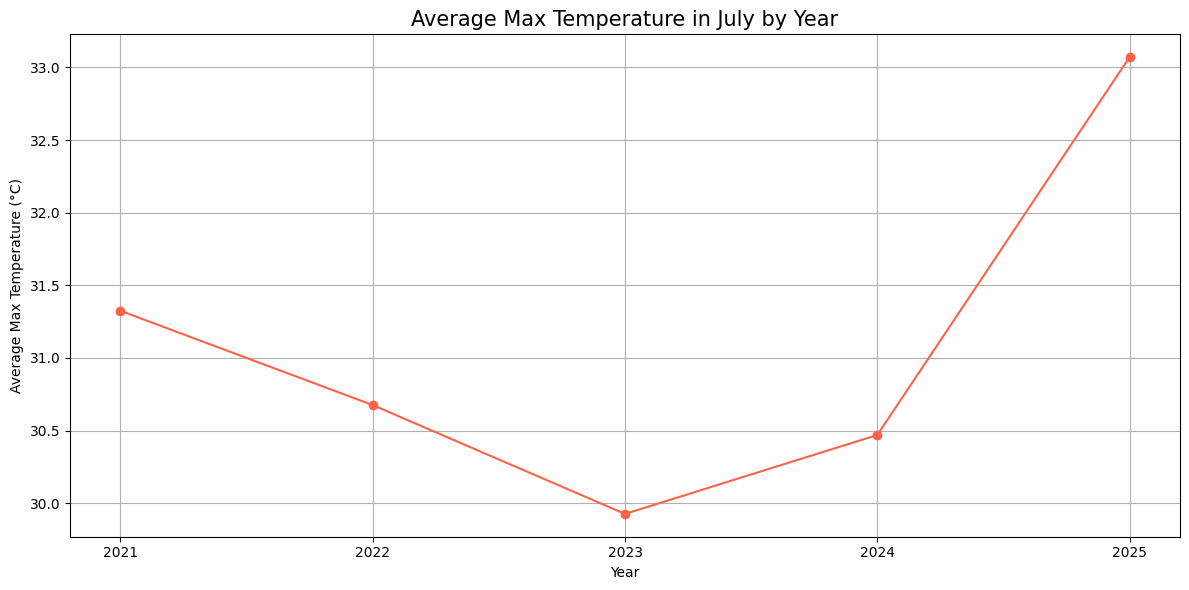

In [5]:
# 연도별 평균 최고기온 시각화 (영문 버전)
plt.figure(figsize=(12, 6))
plt.plot(grouped['연도'], grouped['최고기온(°C)'], marker='o', color='tomato')
plt.title("Average Max Temperature in July by Year", fontsize=15)
plt.xlabel("Year")
plt.ylabel("Average Max Temperature (°C)")
plt.xticks(range(2021, 2026))
plt.grid(True)
plt.tight_layout()
plt.show()

## 🔍 추가 탐구 과제
- 폭염 여부(`폭염여부(O/X)`)가 'O'인 날의 개수를 연도별로 비교해보세요.
- 열대야 발생 여부(`열대야(O/X)`)의 빈도를 연도별로 확인해보세요.
- `폭염특보(O/X)` 비율이나 `자외선지수(단계)`의 평균 등도 함께 분석할 수 있습니다.

연도별 폭염(O) 일수
     연도  폭염일수
0  2021   0.0
1  2022   0.0
2  2023   0.0
3  2024   0.0
4  2025   0.0

연도별 열대야(O) 일수
     연도  열대야일수
0  2021    0.0
1  2022    0.0
2  2023    0.0
3  2024    0.0
4  2025    0.0

연도별 폭염특보(O) 비율(%)
     연도  폭염특보 비율(%)
0  2021         NaN
1  2022         NaN
2  2023         NaN
3  2024         NaN
4  2025         NaN

연도별 평균 자외선지수
     연도  평균 자외선지수
0  2021  3.308443
1  2022  3.233771
2  2023  2.667861
3  2024  1.000000
4  2025  1.000000


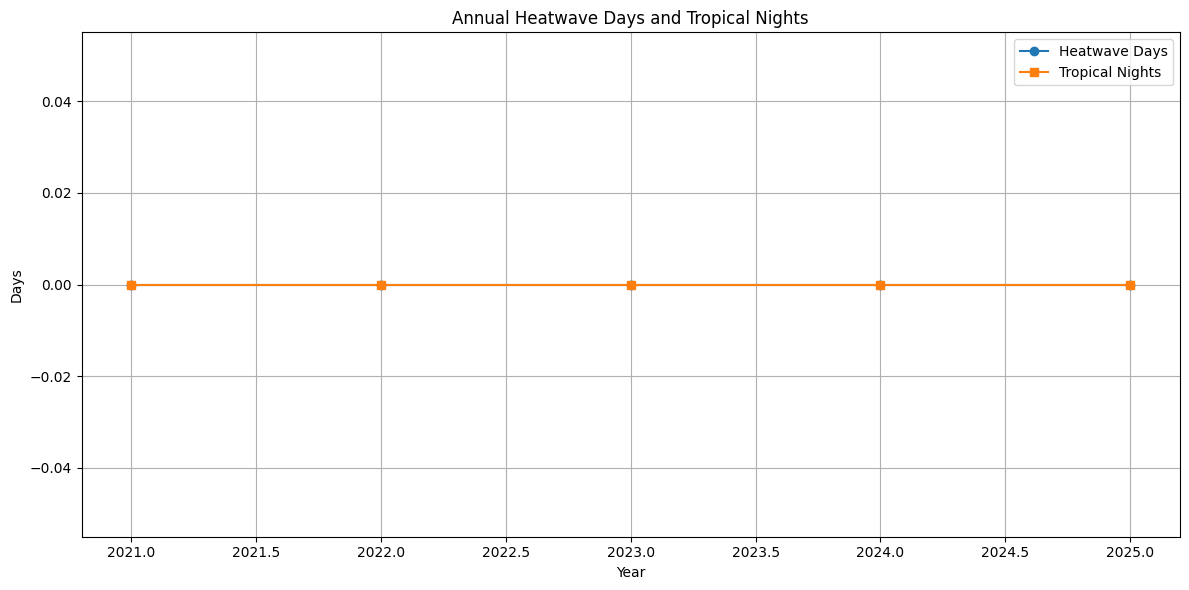

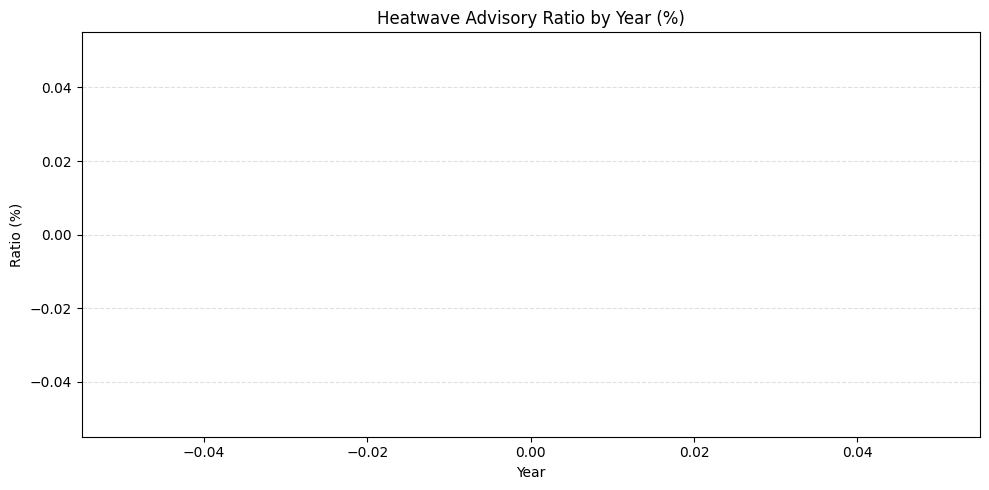

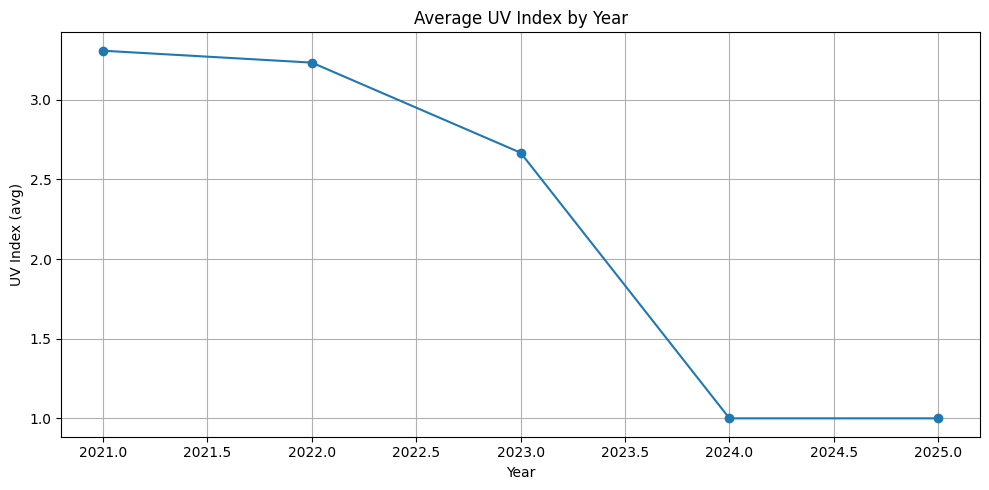

In [10]:
# =========================
# 1) 값 정리/형 변환
# =========================
# O/X 컬럼을 1/0 숫자로 변환 (공백, 소문자, 잡문자 대응)
ox_cols = ['폭염여부(O/X)', '열대야(O/X)', '폭염특보(O/X)']
for c in ox_cols:
    if c in combined_df.columns:
        combined_df[c] = (
            combined_df[c]
            .astype(str)
            .str.strip()
            .str.upper()
            .str.replace(r'[^OX]', '', regex=True)  # O/X 이외 문자 제거
            .map({'O': 1, 'X': 0})
        )

# 자외선 지수: 숫자열이 있으면 그걸 사용, 없으면 (단계) 텍스트를 숫자로 매핑
uv_numeric_col = None
if '자외선지수' in combined_df.columns:
    combined_df['자외선지수'] = pd.to_numeric(combined_df['자외선지수'], errors='coerce')
    uv_numeric_col = '자외선지수'
elif '자외선지수(단계)' in combined_df.columns:
    # 공백 제거 후 단계 텍스트를 숫자로 매핑
    stage = (
        combined_df['자외선지수(단계)']
        .astype(str).str.strip().str.replace(r'\s+', '', regex=True)
    )
    stage_map = {
        '낮음': 1, '약함': 1,
        '보통': 2,
        '높음': 3, '강함': 3,
        '매우높음': 4, '매우강함': 4,
        '위험': 5
    }
    combined_df['자외선지수_수치'] = stage.map(stage_map)
    uv_numeric_col = '자외선지수_수치'

# =========================
# 2) 집계
# =========================
by_year = combined_df.groupby('연도')

# 폭염 여부(O) 일수
if '폭염여부(O/X)' in combined_df.columns:
    heatwave_days = by_year['폭염여부(O/X)'].sum().reset_index(name='폭염일수')
    print("연도별 폭염(O) 일수")
    print(heatwave_days)
else:
    heatwave_days = None
    print("⚠️ '폭염여부(O/X)' 열이 없습니다.")

# 열대야(O) 일수
if '열대야(O/X)' in combined_df.columns:
    tropical_nights = by_year['열대야(O/X)'].sum().reset_index(name='열대야일수')
    print("\n연도별 열대야(O) 일수")
    print(tropical_nights)
else:
    tropical_nights = None
    print("⚠️ '열대야(O/X)' 열이 없습니다.")

# 폭염특보 비율(%) = O 비율 * 100
if '폭염특보(O/X)' in combined_df.columns:
    heatwave_alert_ratio = (by_year['폭염특보(O/X)'].mean() * 100).round(1)\
                            .reset_index(name='폭염특보 비율(%)')
    print("\n연도별 폭염특보(O) 비율(%)")
    print(heatwave_alert_ratio)
else:
    heatwave_alert_ratio = None
    print("⚠️ '폭염특보(O/X)' 열이 없습니다.")

# 자외선지수 평균
if uv_numeric_col is not None:
    uv_index_mean = by_year[uv_numeric_col].mean().reset_index(name='평균 자외선지수')
    print("\n연도별 평균 자외선지수")
    print(uv_index_mean)
else:
    uv_index_mean = None
    print("⚠️ 자외선 지수 관련 열이 없어 평균을 계산하지 않았습니다.")

# =========================
# 3) 시각화 예시
# =========================
# (1) 폭염/열대야 일수 라인 그래프
if (heatwave_days is not None) and (tropical_nights is not None):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 6))
    plt.plot(heatwave_days['연도'], heatwave_days['폭염일수'], marker='o', label='Heatwave Days')
    plt.plot(tropical_nights['연도'], tropical_nights['열대야일수'], marker='s', label='Tropical Nights')
    plt.title("Annual Heatwave Days and Tropical Nights")
    plt.xlabel("Year"); plt.ylabel("Days")
    plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

# (2) 폭염특보 비율(%) 바 차트
if heatwave_alert_ratio is not None:
    plt.figure(figsize=(10, 5))
    plt.bar(heatwave_alert_ratio['연도'], heatwave_alert_ratio['폭염특보 비율(%)'])
    plt.title("Heatwave Advisory Ratio by Year (%)")
    plt.xlabel("Year"); plt.ylabel("Ratio (%)")
    plt.grid(True, axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout(); plt.show()

# (3) 자외선지수 평균 라인 그래프
if uv_index_mean is not None:
    plt.figure(figsize=(10, 5))
    plt.plot(uv_index_mean['연도'], uv_index_mean['평균 자외선지수'], marker='o')
    plt.title("Average UV Index by Year")
    plt.xlabel("Year"); plt.ylabel("UV Index (avg)")
    plt.grid(True); plt.tight_layout(); plt.show()
